# Importing Libraries and Files

In [ ]:
# Importing necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import random
from cv2 import resize
from glob import glob

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Specifiying set value for a specific option
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 3)

In [ ]:
# Importing Power Generation and Weather Sensor Data
gen_data = pd.read_csv('/content/Plant_2_Generation_Data.csv')
wthr_data = pd.read_csv('/content/Plant_2_Weather_Sensor_Data.csv')

In [ ]:
# Sample Data from Generation Dataset
gen_data.sample(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
53479  2020-06-11 06:15:00   4136001  oZ35aAeoifZaQzV    13.027    12.567   
2776   2020-05-16 07:45:00   4136001  IQ2d7wF4YD8zU1Q   407.643   400.157   
34136  2020-06-02 02:15:00   4136001  Qf4GUc1pJu5T6c6     0.000     0.000   
66505  2020-06-17 10:15:00   4136001  q49J1IKaHRwDQnt   456.660   448.140   
8133   2020-05-18 20:30:00   4136001  oZ35aAeoifZaQzV     0.000     0.000   

       DAILY_YIELD  TOTAL_YIELD  
53479        1.267    1.660e+09  
2776       319.286    1.995e+07  
34136        0.000    8.386e+08  
66505      840.933    5.174e+05  
8133      7750.000    1.660e+09

In [ ]:
# Sample Data from Weather Dataset
wthr_data.sample(5)

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
3253  2020-06-17 22:30:00   4136001  iq8k7ZNt4Mwm3w0               23.628   
1698  2020-06-01 17:15:00   4136001  iq8k7ZNt4Mwm3w0               24.645   
1382  2020-05-29 10:00:00   4136001  iq8k7ZNt4Mwm3w0               29.866   
321   2020-05-18 08:30:00   4136001  iq8k7ZNt4Mwm3w0               25.090   
982   2020-05-25 06:00:00   4136001  iq8k7ZNt4Mwm3w0               25.075   

      MODULE_TEMPERATURE  IRRADIATION  
3253              23.029        0.000  
1698              24.180        0.024  
1382              46.879        0.748  
321               29.413        0.286  
982               23.767        0.014

# Date & Time Adjustment

In [ ]:
# Adjusting Date and Time for Generation and Weather Data
gen_data['DATE_TIME'] = pd.to_datetime(gen_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
wthr_data['DATE_TIME'] = pd.to_datetime(wthr_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

# Merging Power Generation and Weather Sensor Data

In [ ]:
# Merging Data, Generation Data and Weather Data
solar = pd.merge(gen_data.drop(columns = ['PLANT_ID']), wthr_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
solar.sample(5).style.background_gradient(cmap='cool')

# Adding Seperate Time and Data Columns

In [ ]:
# Adding separate Time and Date columns
solar["DATE"] = pd.to_datetime(solar["DATE_TIME"]).dt.date
solar["TIME"] = pd.to_datetime(solar["DATE_TIME"]).dt.time
solar['DAY'] = pd.to_datetime(solar['DATE_TIME']).dt.day
solar['MONTH'] = pd.to_datetime(solar['DATE_TIME']).dt.month
solar['WEEK'] = pd.to_datetime(solar['DATE_TIME']).dt.week

# Add Hours and Minutes for ML models
solar['HOURS'] = pd.to_datetime(solar['TIME'],format='%H:%M:%S').dt.hour
solar['MINUTES'] = pd.to_datetime(solar['TIME'],format='%H:%M:%S').dt.minute
solar['TOTAL MINUTES PASS'] = solar['MINUTES'] + solar['HOURS']*60

# Add Date as string column
solar["DATE_STRING"] = solar["DATE"].astype(str) # add column with date as string
solar["HOURS"] = solar["HOURS"].astype(str)
solar["TIME"] = solar["TIME"].astype(str)

solar.head(2)

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0 2020-05-15  4UPUqMRk7TRMgml       0.0       0.0       9425.0    2.429e+06   
1 2020-05-15  81aHJ1q11NBPMrL       0.0       0.0          0.0    1.215e+09   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATE      TIME  \
0               27.005              25.061          0.0  2020-05-15  00:00:00   
1               27.005              25.061          0.0  2020-05-15  00:00:00   

   DAY  MONTH  WEEK HOURS  MINUTES  TOTAL MINUTES PASS DATE_STRING  
0   15      5    20     0        0                   0  2020-05-15  
1   15      5    20     0        0                   0  2020-05-15

In [ ]:
# Information about the new dataset formed
solar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67698 entries, 0 to 67697
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   DATE                 67698 non-null  object        
 10  TIME                 67698 non-null  object        
 11  DAY                  67698 non-null  int64         
 12  MONTH                67698 non-null  int64         
 13  WEEK                 67698 non-

In [ ]:
# Null Count for each column in the Dataset
solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

In [ ]:
# Description of the data in the DataFrame
solar.describe().style.background_gradient(cmap='rainbow')

# Converting Catergorical Data to Numerical Data

In [ ]:
# Converting 'SOURCE_KEY' Categorial to Numerical
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(solar['SOURCE_KEY'])
solar.head()

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0 2020-05-15  4UPUqMRk7TRMgml       0.0       0.0     9425.000    2.429e+06   
1 2020-05-15  81aHJ1q11NBPMrL       0.0       0.0        0.000    1.215e+09   
2 2020-05-15  9kRcWv60rDACzjR       0.0       0.0     3075.333    2.248e+09   
3 2020-05-15  Et9kgGMDl729KT4       0.0       0.0      269.933    1.704e+06   
4 2020-05-15  IQ2d7wF4YD8zU1Q       0.0       0.0     3177.000    1.994e+07   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATE      TIME  \
0               27.005              25.061          0.0  2020-05-15  00:00:00   
1               27.005              25.061          0.0  2020-05-15  00:00:00   
2               27.005              25.061          0.0  2020-05-15  00:00:00   
3               27.005              25.061          0.0  2020-05-15  00:00:00   
4               27.005              25.061          0.0  2020-05-15  00:00:00   

   DAY  MONTH  WEEK HOURS  MINUTES  TOTAL MINUTES PASS DATE_STRING  \
0   15      5    20     0        0                   0  2020-05-15   
1   15      5    20     0        0                   0  2020-05-15   
2   15      5    20     0        0                   0  2020-05-15   
3   15      5    20     0        0                   0  2020-05-15   
4   15      5    20     0        0                   0  2020-05-15   

   SOURCE_KEY_NUMBER  
0                  0  
1                  1  
2                  2  
3                  3  
4                  4

# Data Visualization

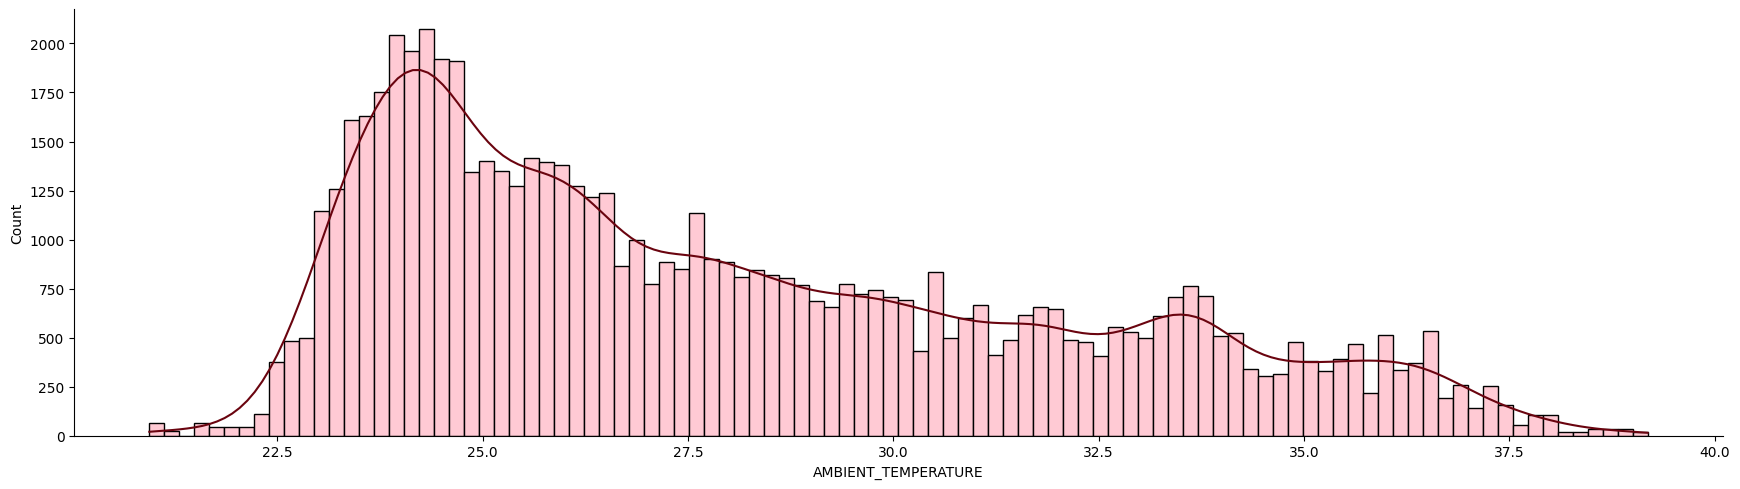

In [ ]:
sns.displot(data=solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "#6a040f", facecolor = "#ffcad4",height = 5, aspect = 3.5);

In [ ]:
solar['DATE'].nunique()

34

# Multiple Plotting of DC_POWER generation on per day basis.

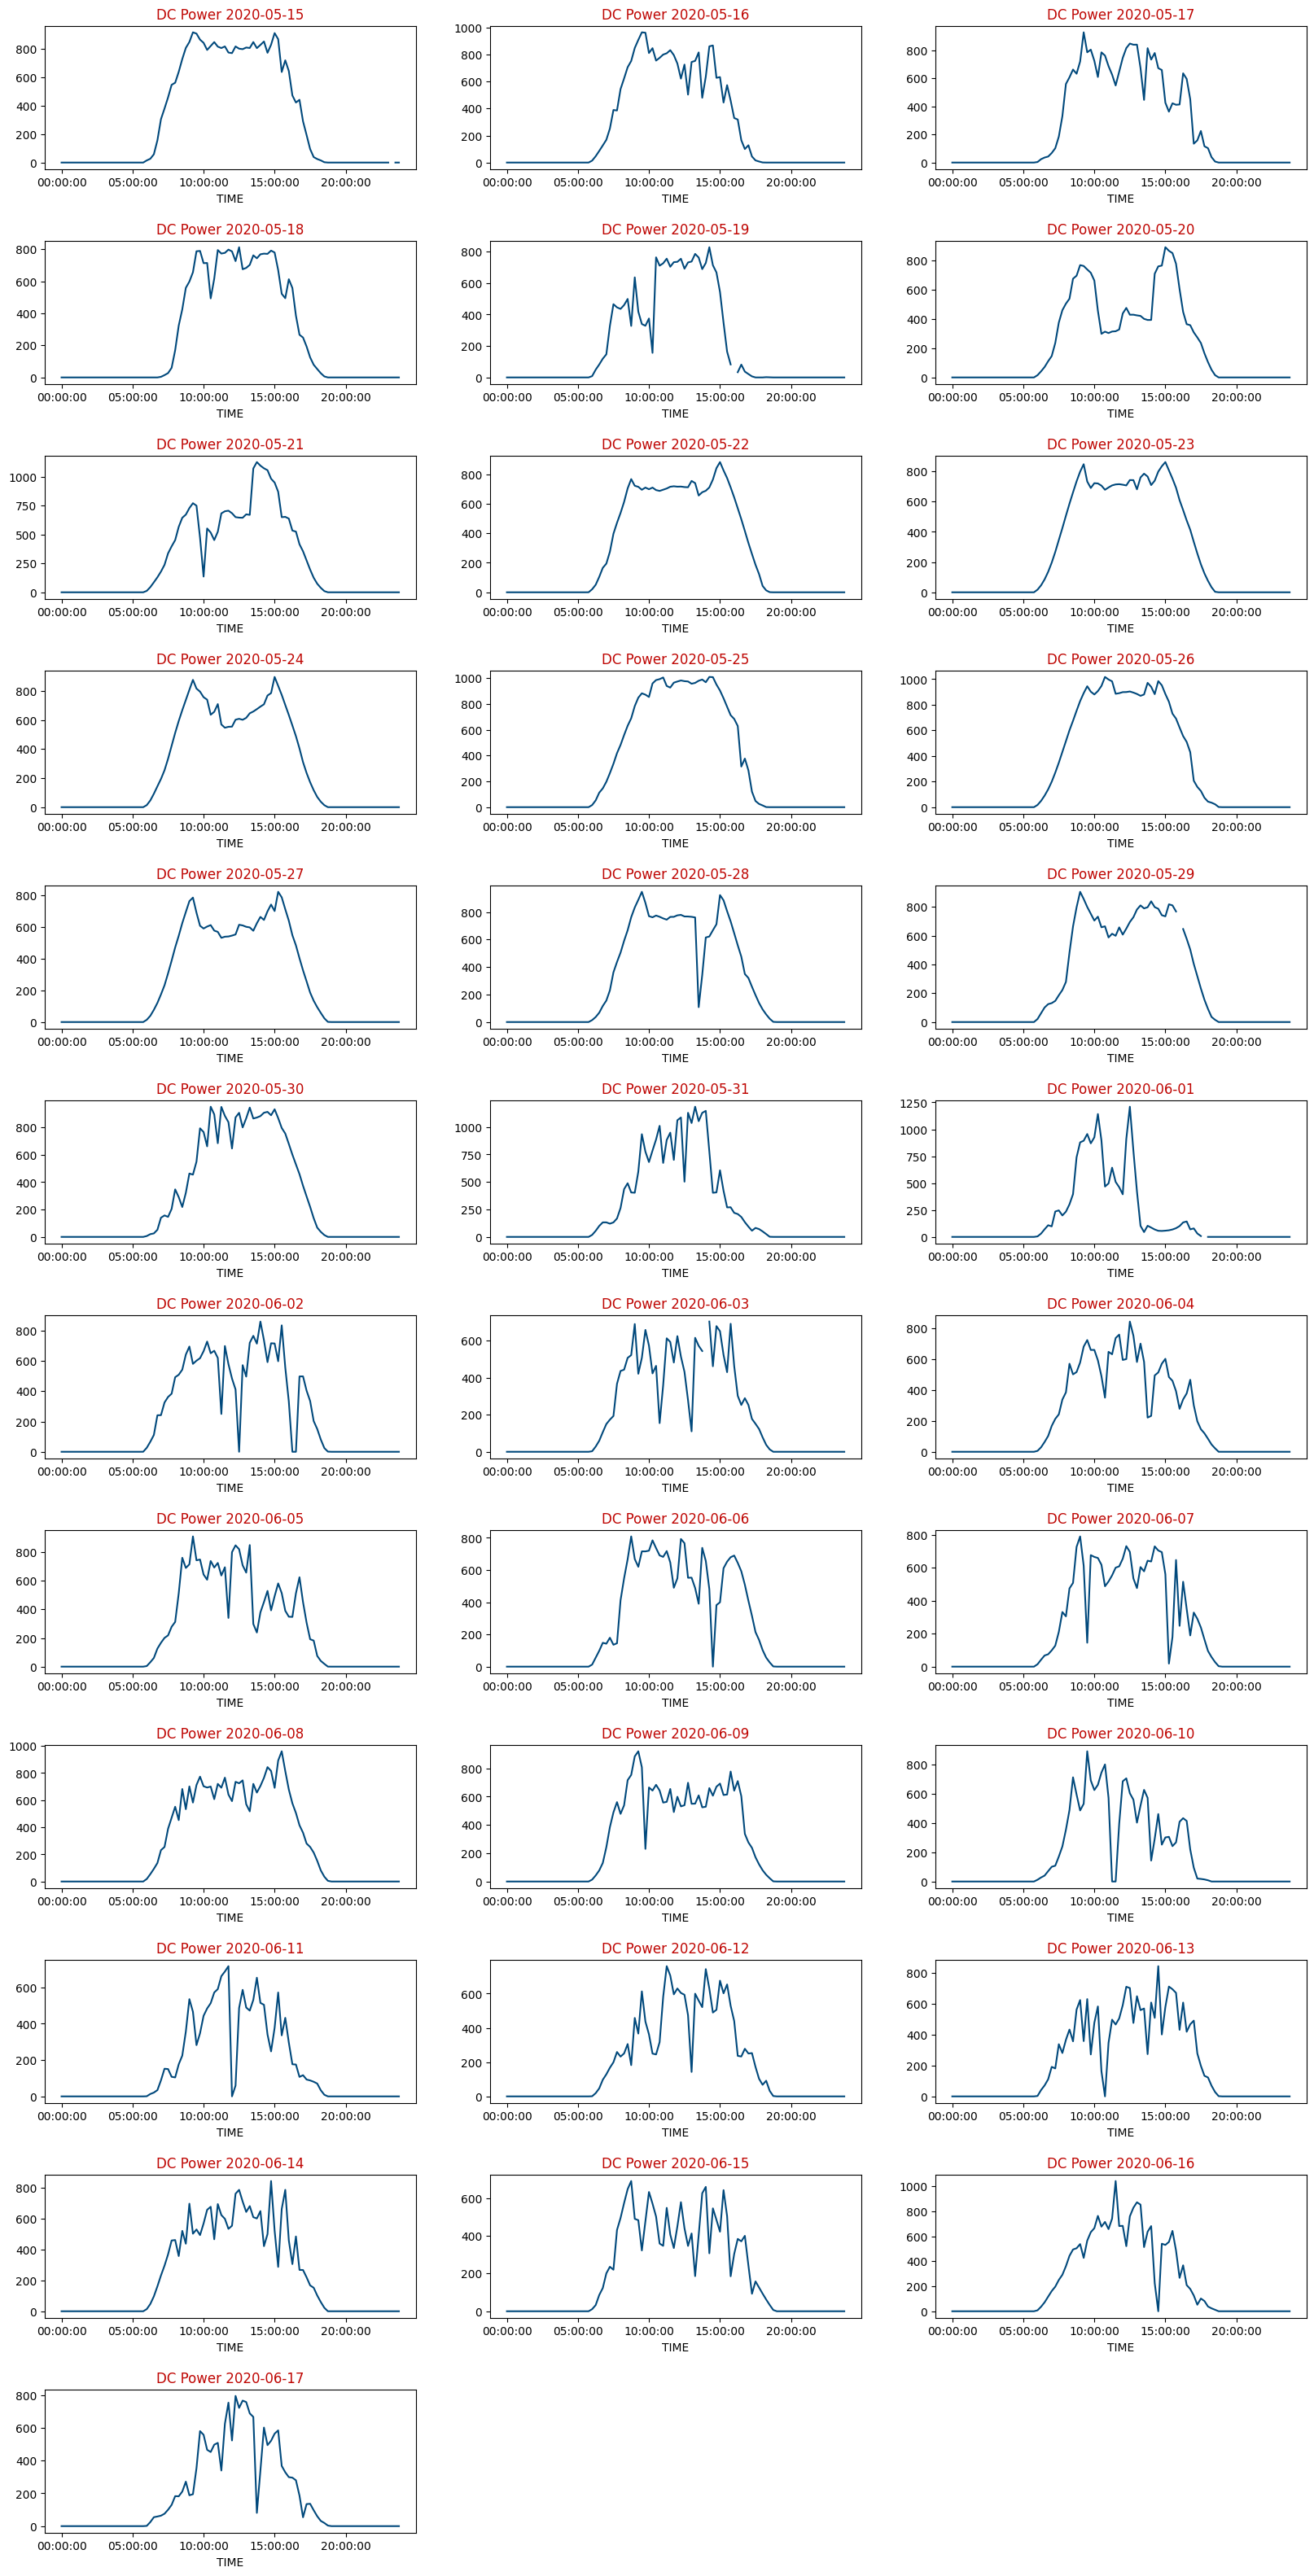

In [ ]:
# Plotting DC_Power Generated on daily basis
solar_dc = solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='#01497c')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='#bf0603')

daywise_plot(data=solar_dc, row=12, col=3)

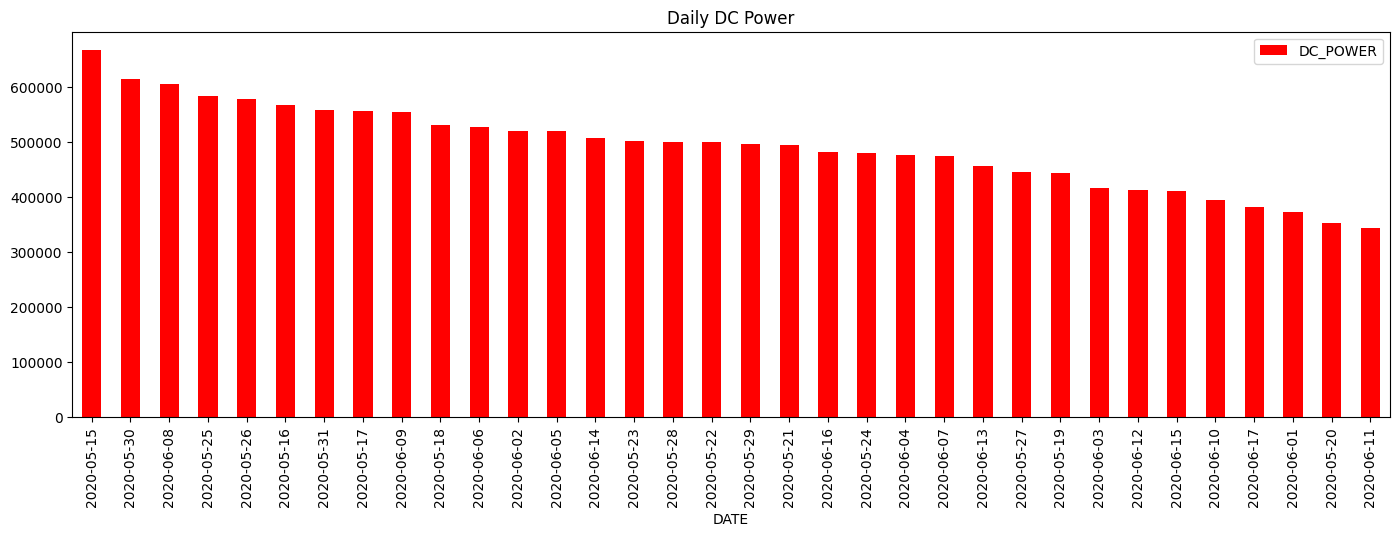

In [ ]:
# Daily DC Power generated
daily_dc = solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='red')
plt.title('Daily DC Power')
plt.show()

# Multiple Plotting of IRRADIATION generation on per day basis.

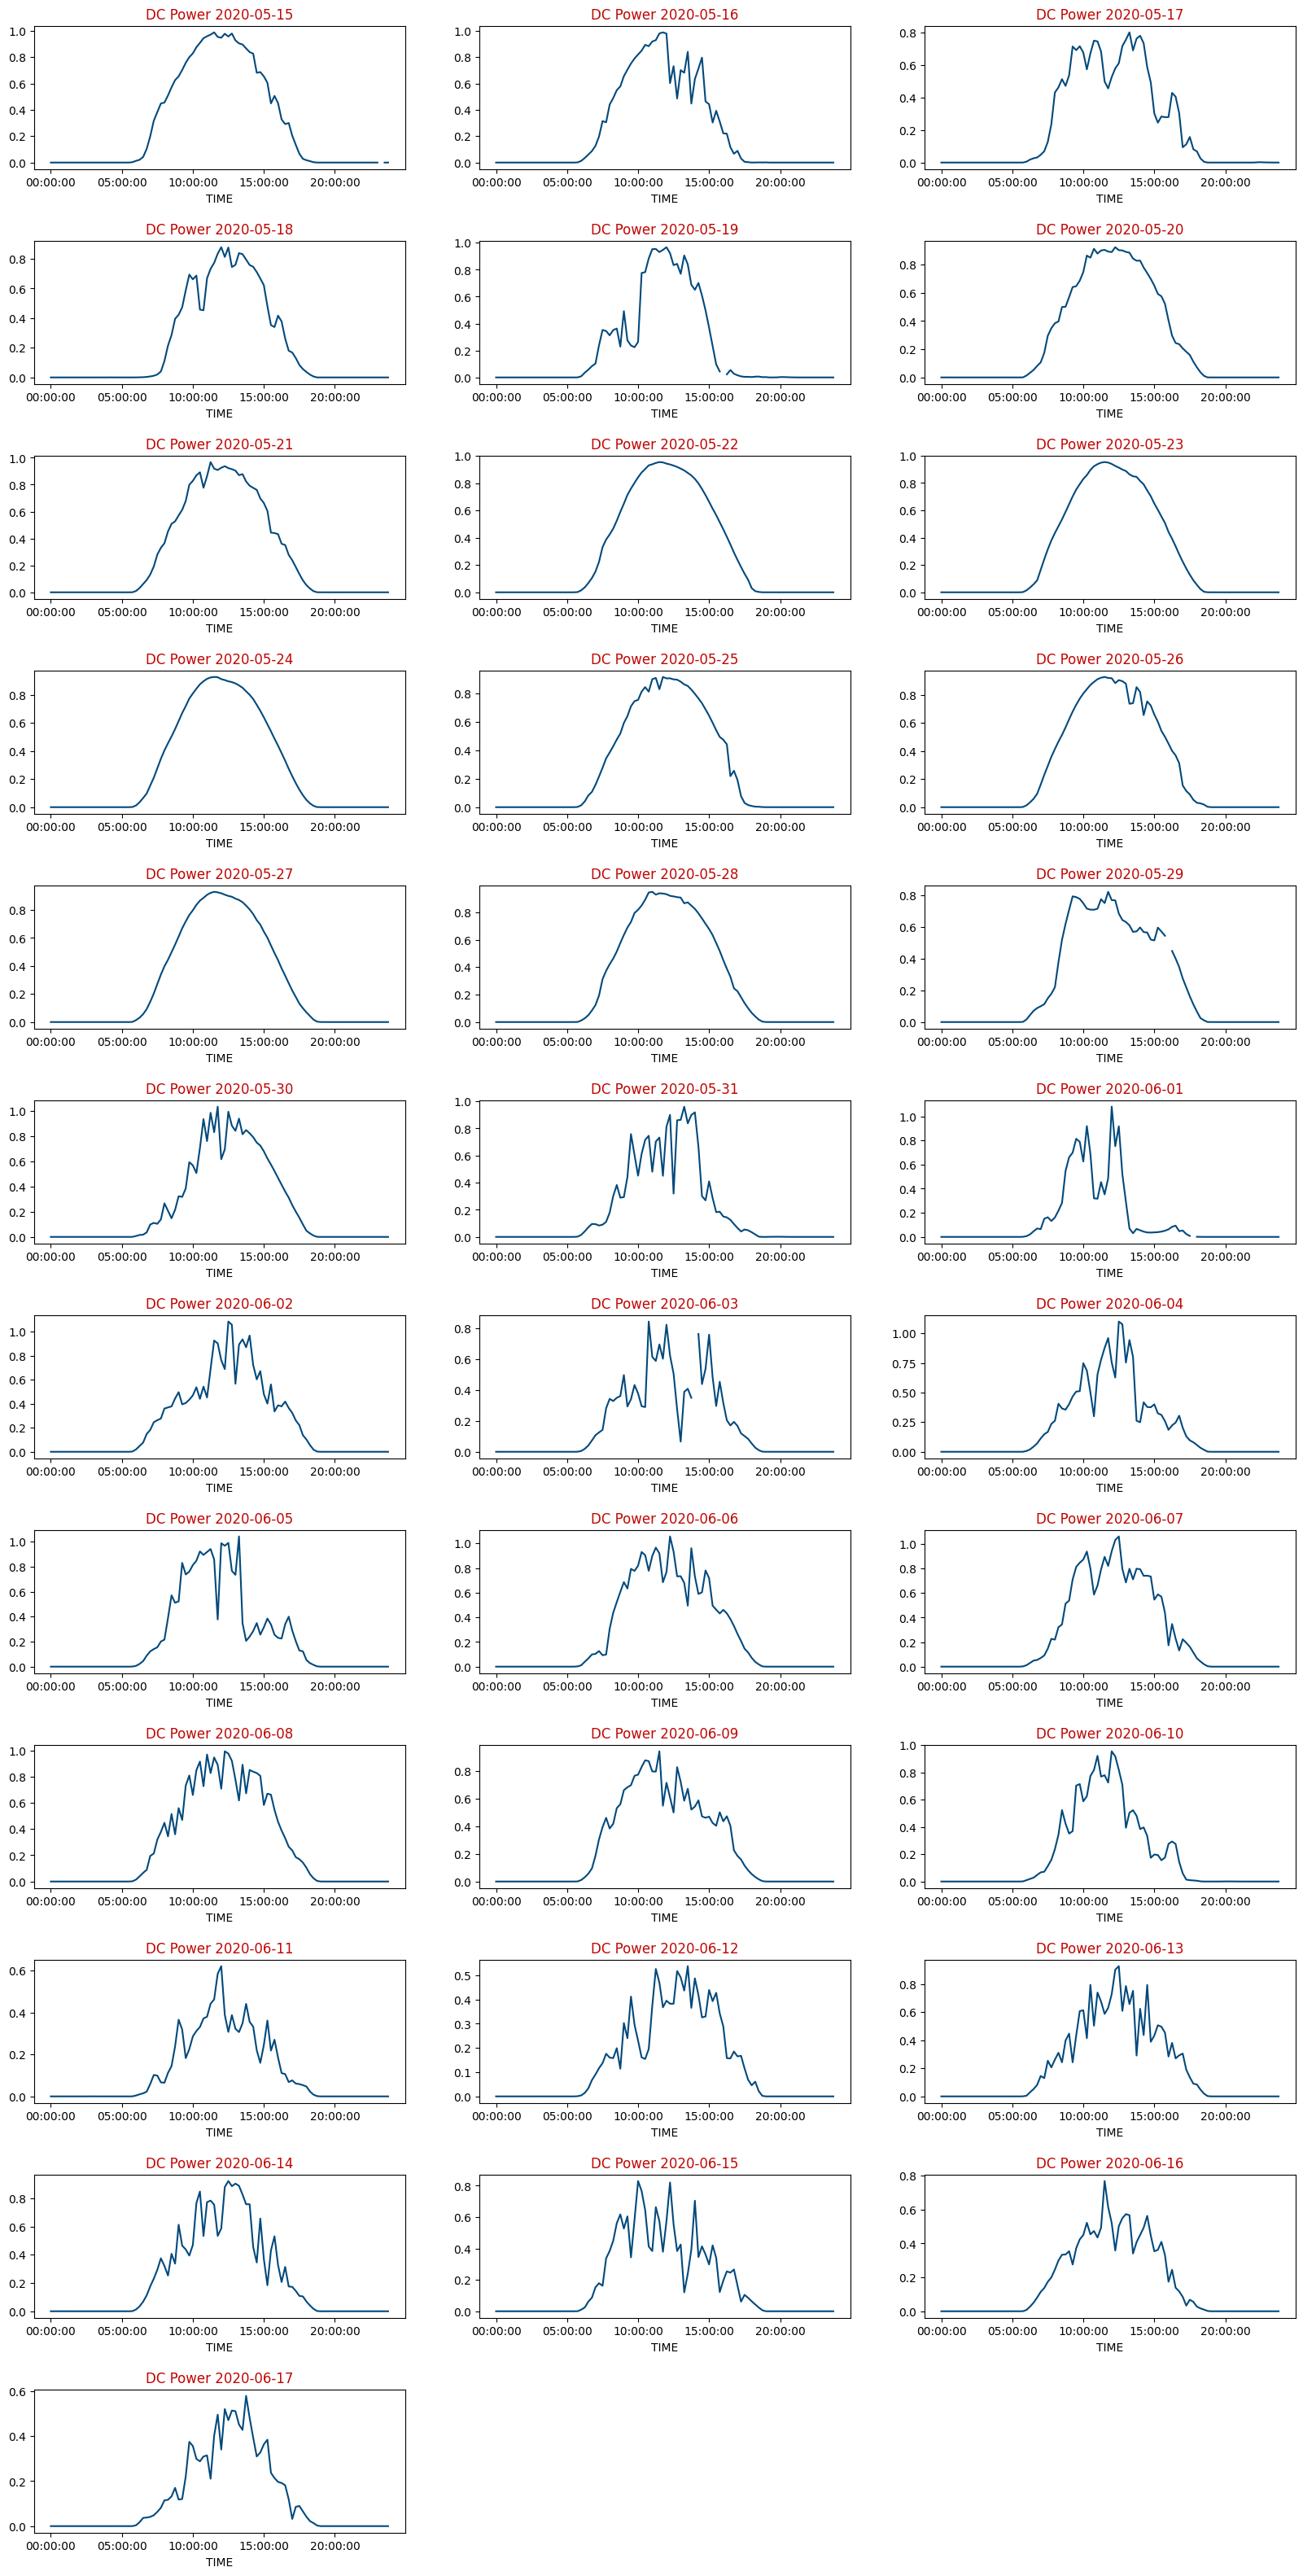

In [ ]:
# Plotting the Irradiation Generated on daily basis
solar_irrad = solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='#01497c')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='#bf0603')

daywise_plot(data=solar_irrad, row=12, col=3)

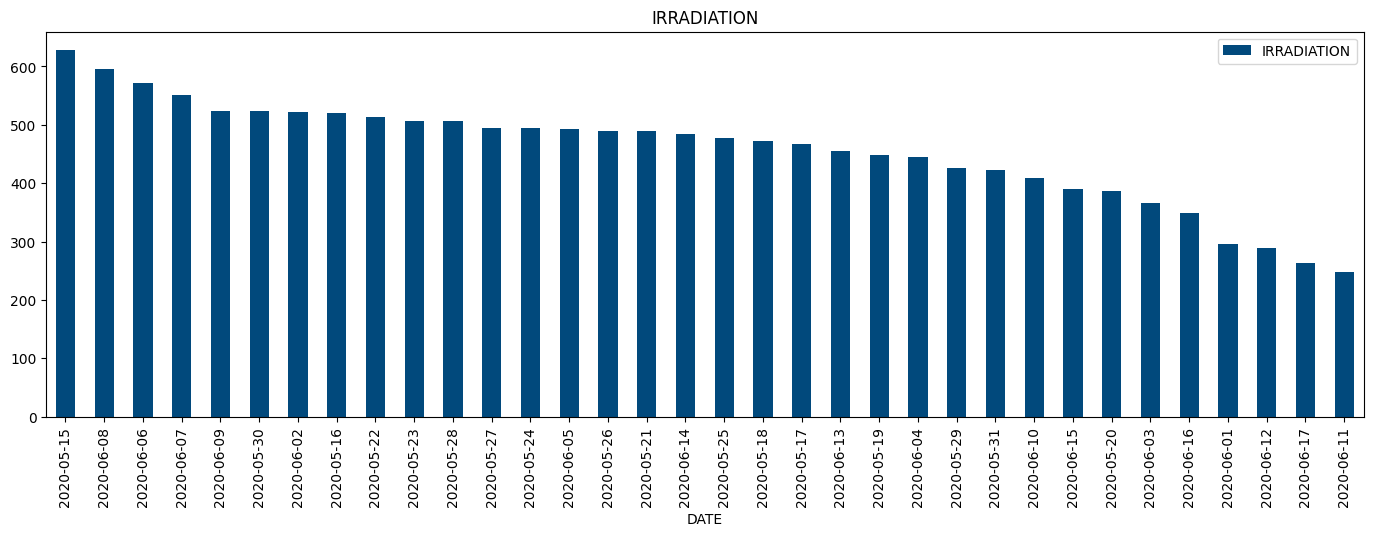

In [ ]:
# Daily Irradiation
daily_irradiation = solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='#01497c')
plt.title('IRRADIATION')
plt.show()

# Multiple Plotting of Ambient Temperature on per day basis.

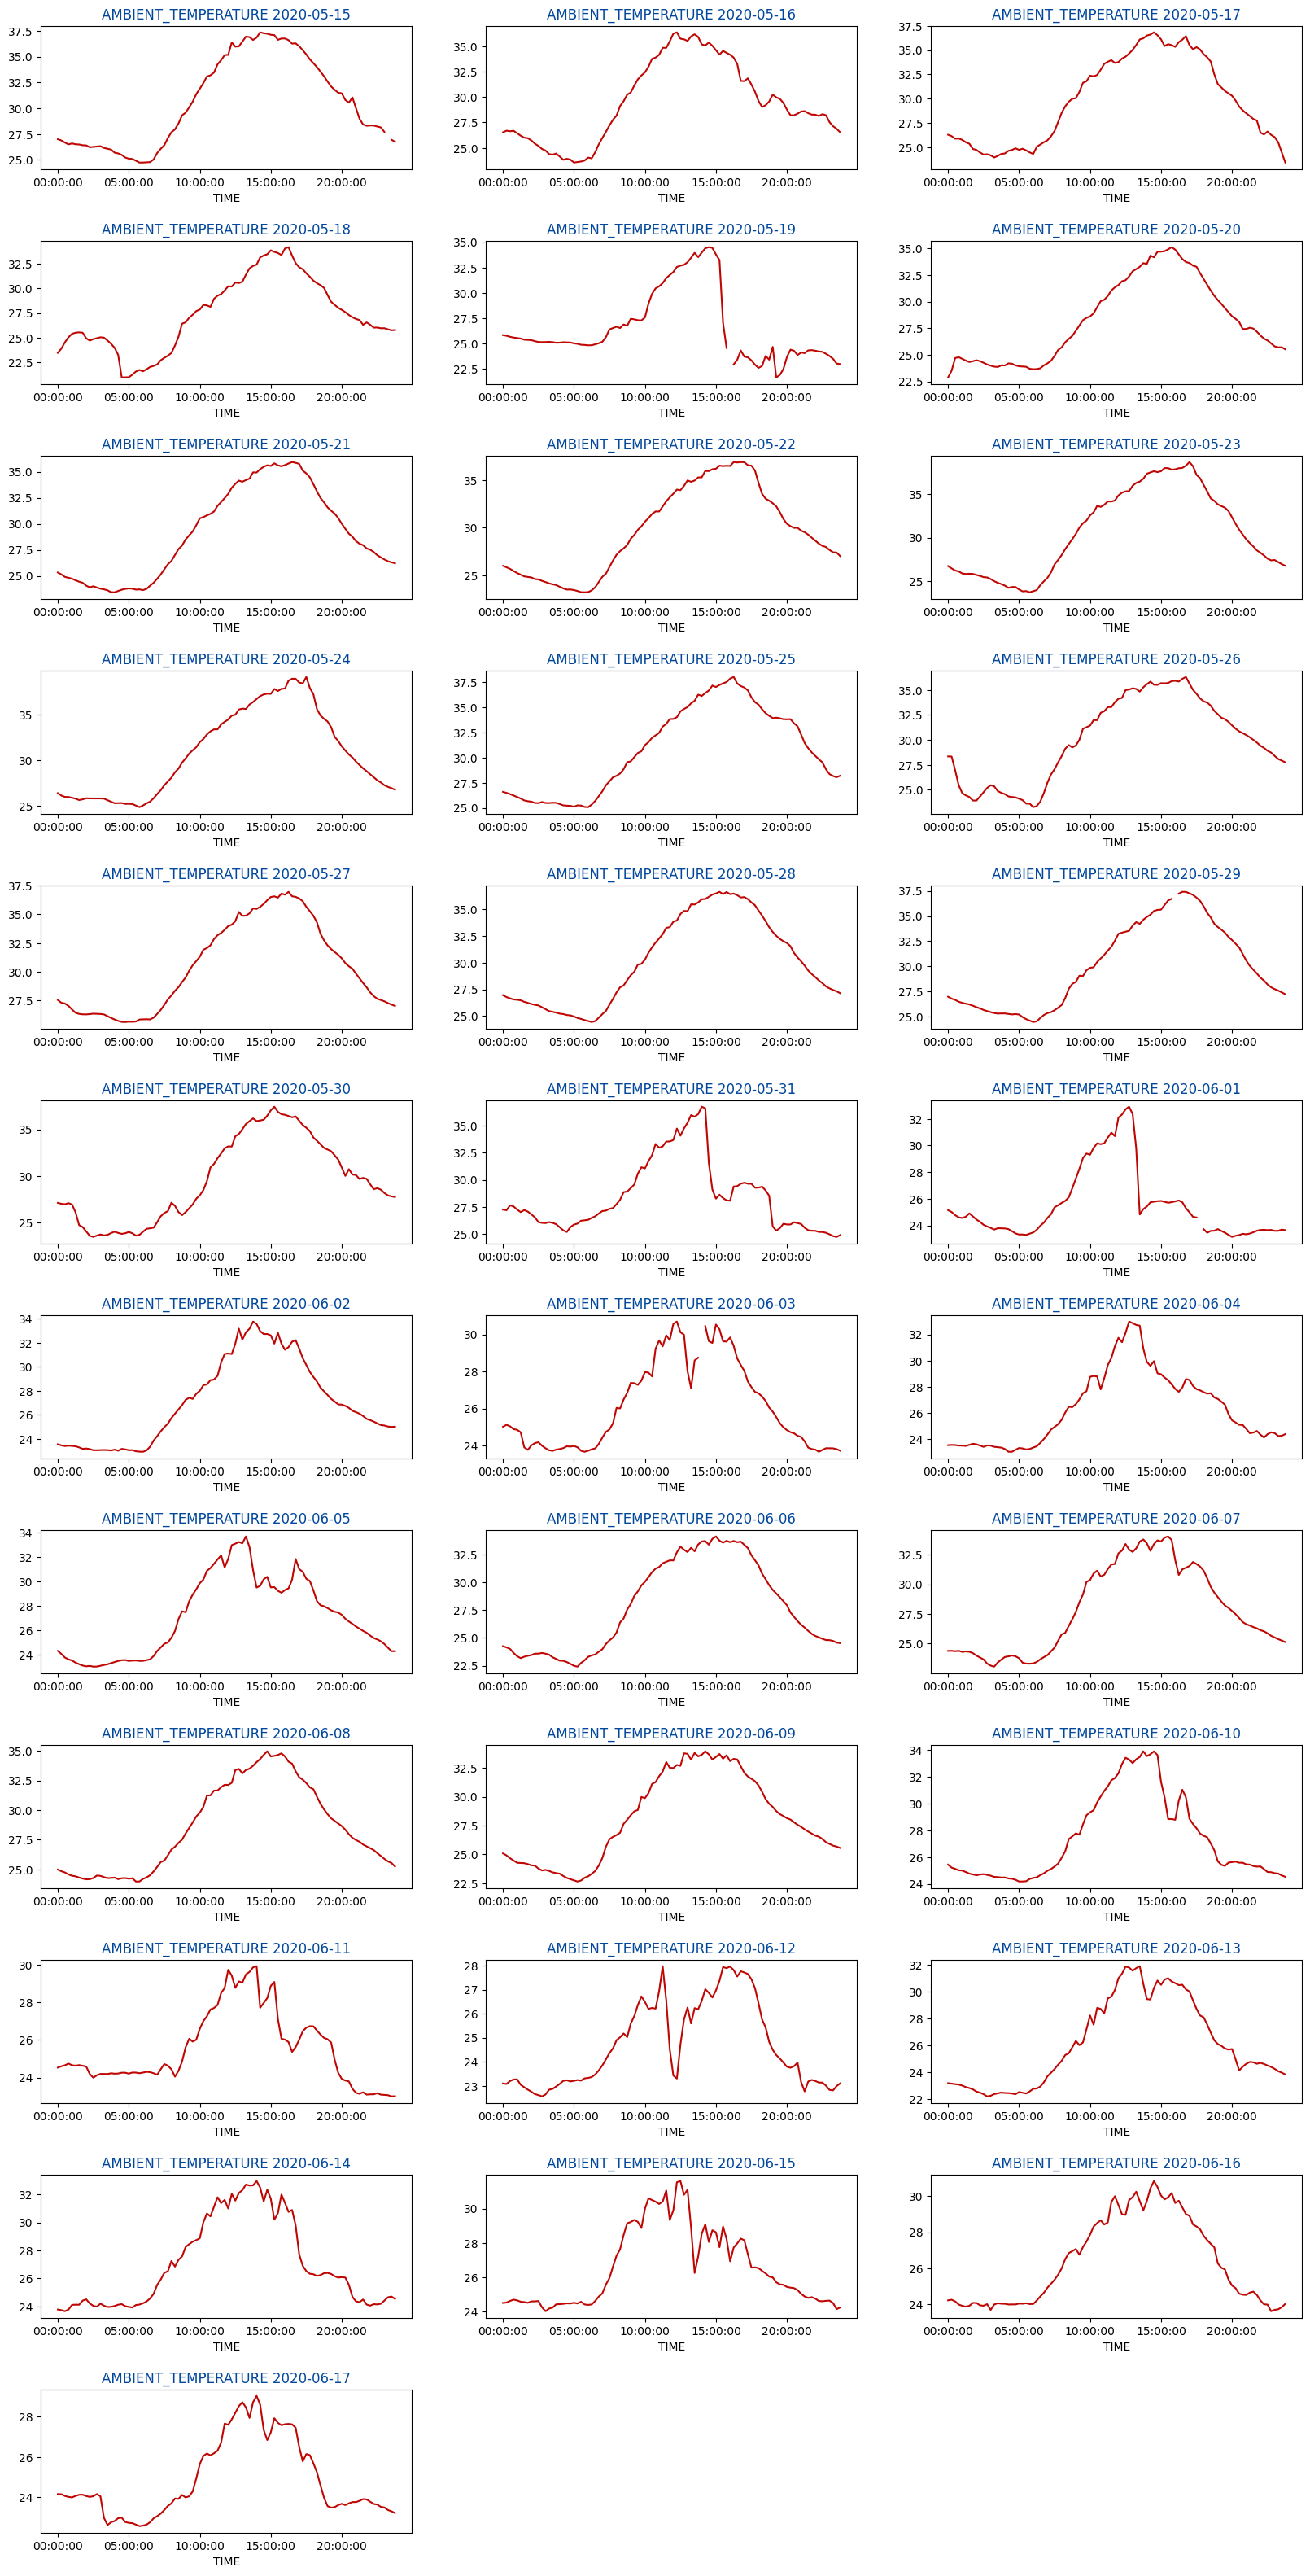

In [ ]:
# Plotting Ambient Temperature on daily basis
solar_ambiant_temp = solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='#bf0603')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='#01479c')

daywise_plot(data=solar_ambiant_temp, row=12, col=3)

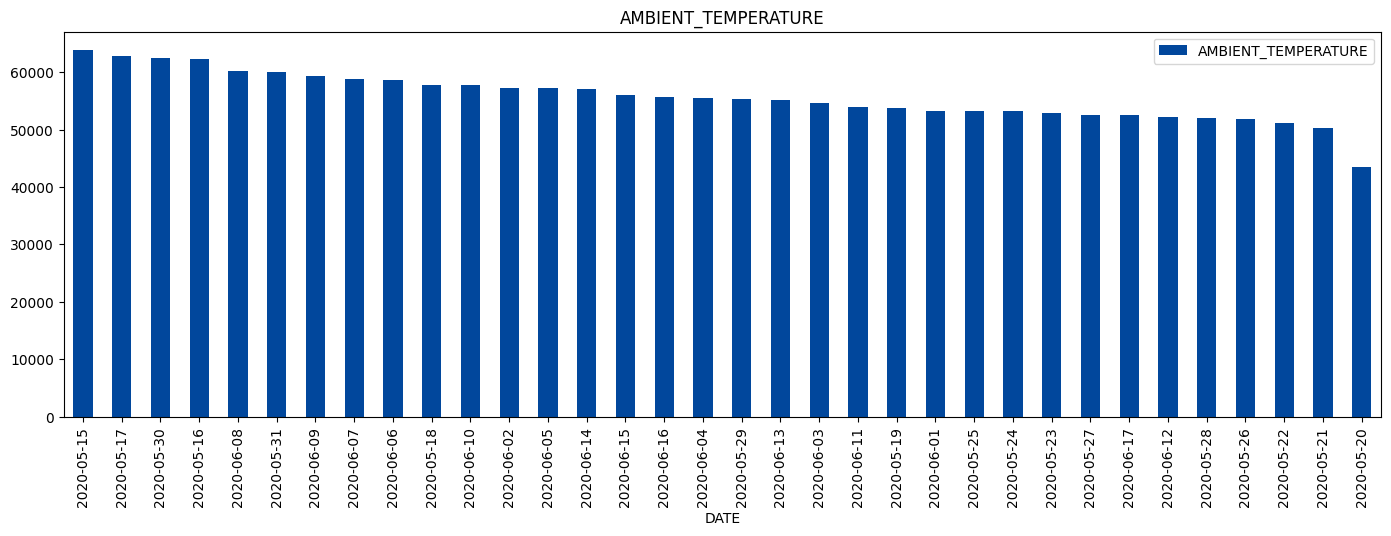

In [ ]:
# Daily Ambient Temperature
daily_ambient_temp = solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='#01479c')
plt.title('AMBIENT_TEMPERATURE')
plt.show()


# Highest Average on a Particular Day

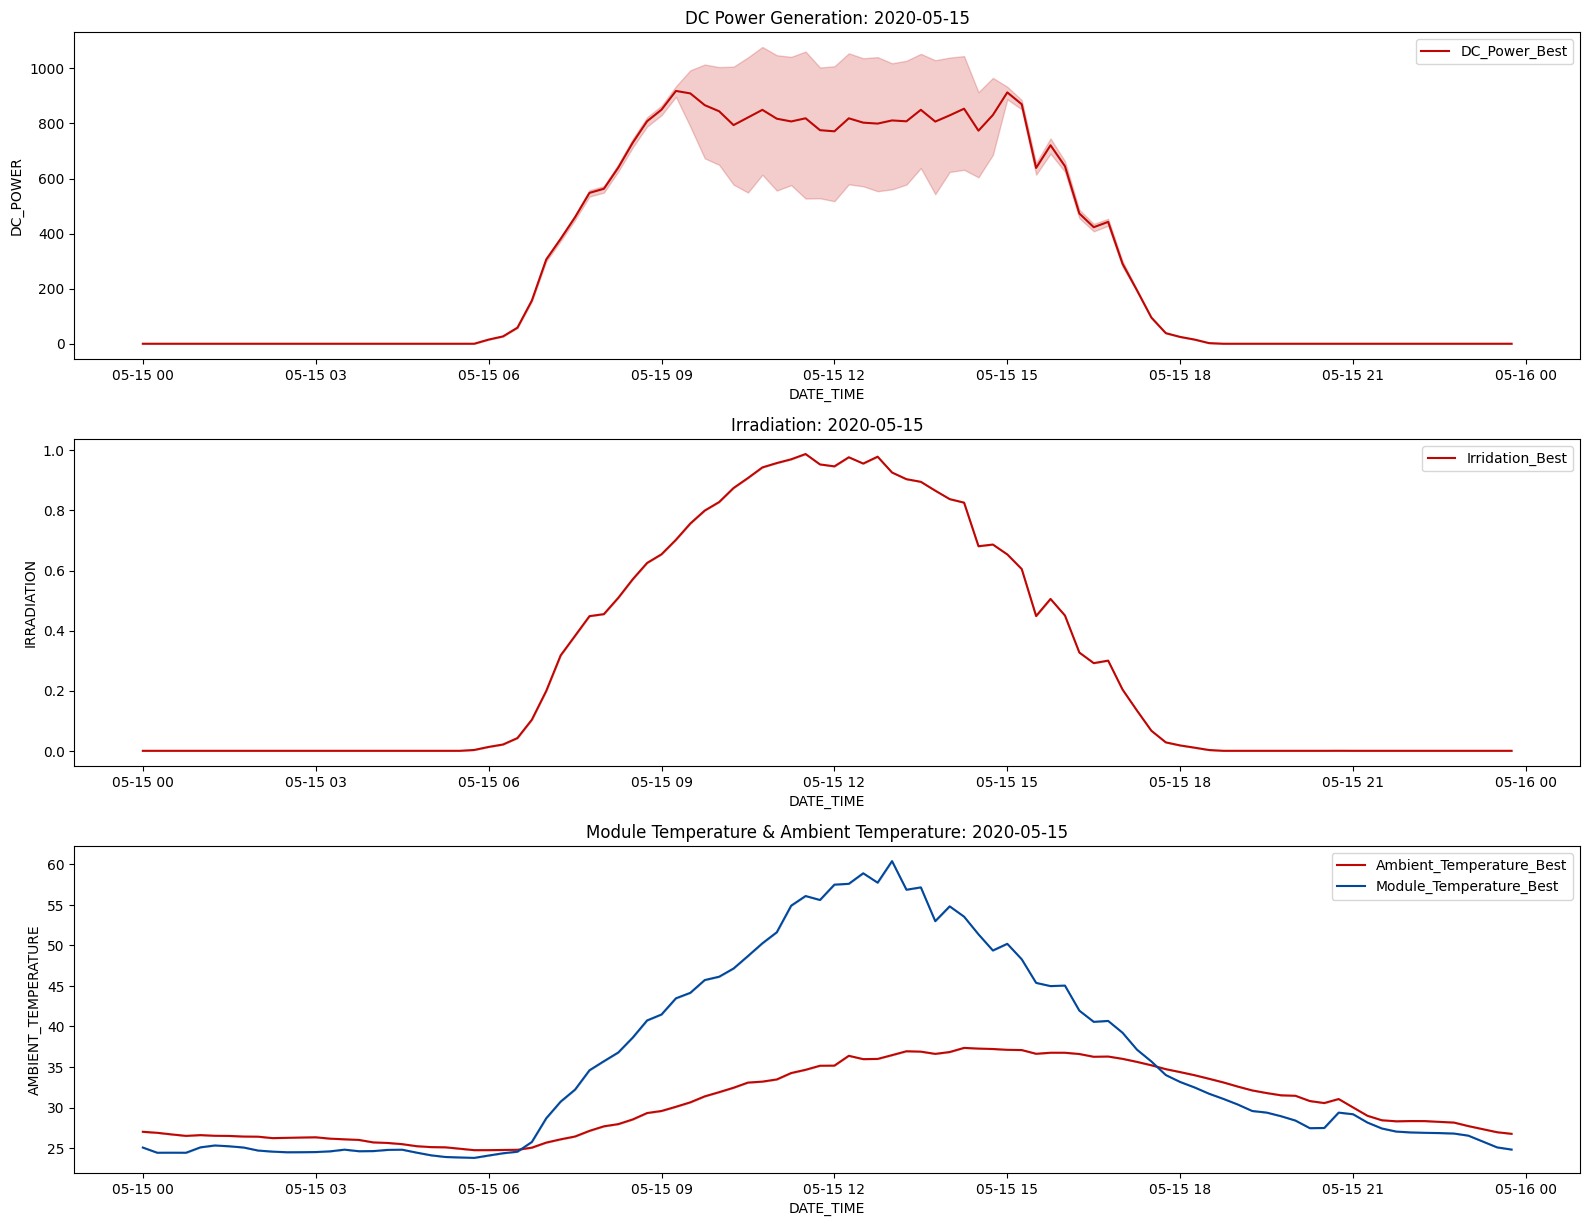

In [ ]:
# Highest Average on "2020-05-15"
plt.figure(figsize=(16, 16))

date = ["2020-05-15"]

# DC Power
plt.subplot(411)
sns.lineplot(x=solar[solar["DATE_STRING"].isin(date)].DATE_TIME, y=solar[solar["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Best", color='#bf0603')
plt.title("DC Power Generation: {}".format(date[0]))

# Irradiation
plt.subplot(412)
sns.lineplot(x=solar[solar["DATE_STRING"].isin(date)].DATE_TIME, y=solar[solar["DATE_STRING"].isin(date)].IRRADIATION, label="Irridation_Best", color='#bf0603')
plt.title("Irradiation: {}".format(date[0]))

# Module Temperature & Ambient Temperature
plt.subplot(413)
sns.lineplot(x=solar[solar["DATE_STRING"].isin(date)].DATE_TIME, y=solar[solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Best", color='#bf0603')
sns.lineplot(x=solar[solar["DATE_STRING"].isin(date)].DATE_TIME, y=solar[solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Best", color='#01479c')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()

Low Fluctuations and close to ideal graph

# Lowest Average on a Particular Day

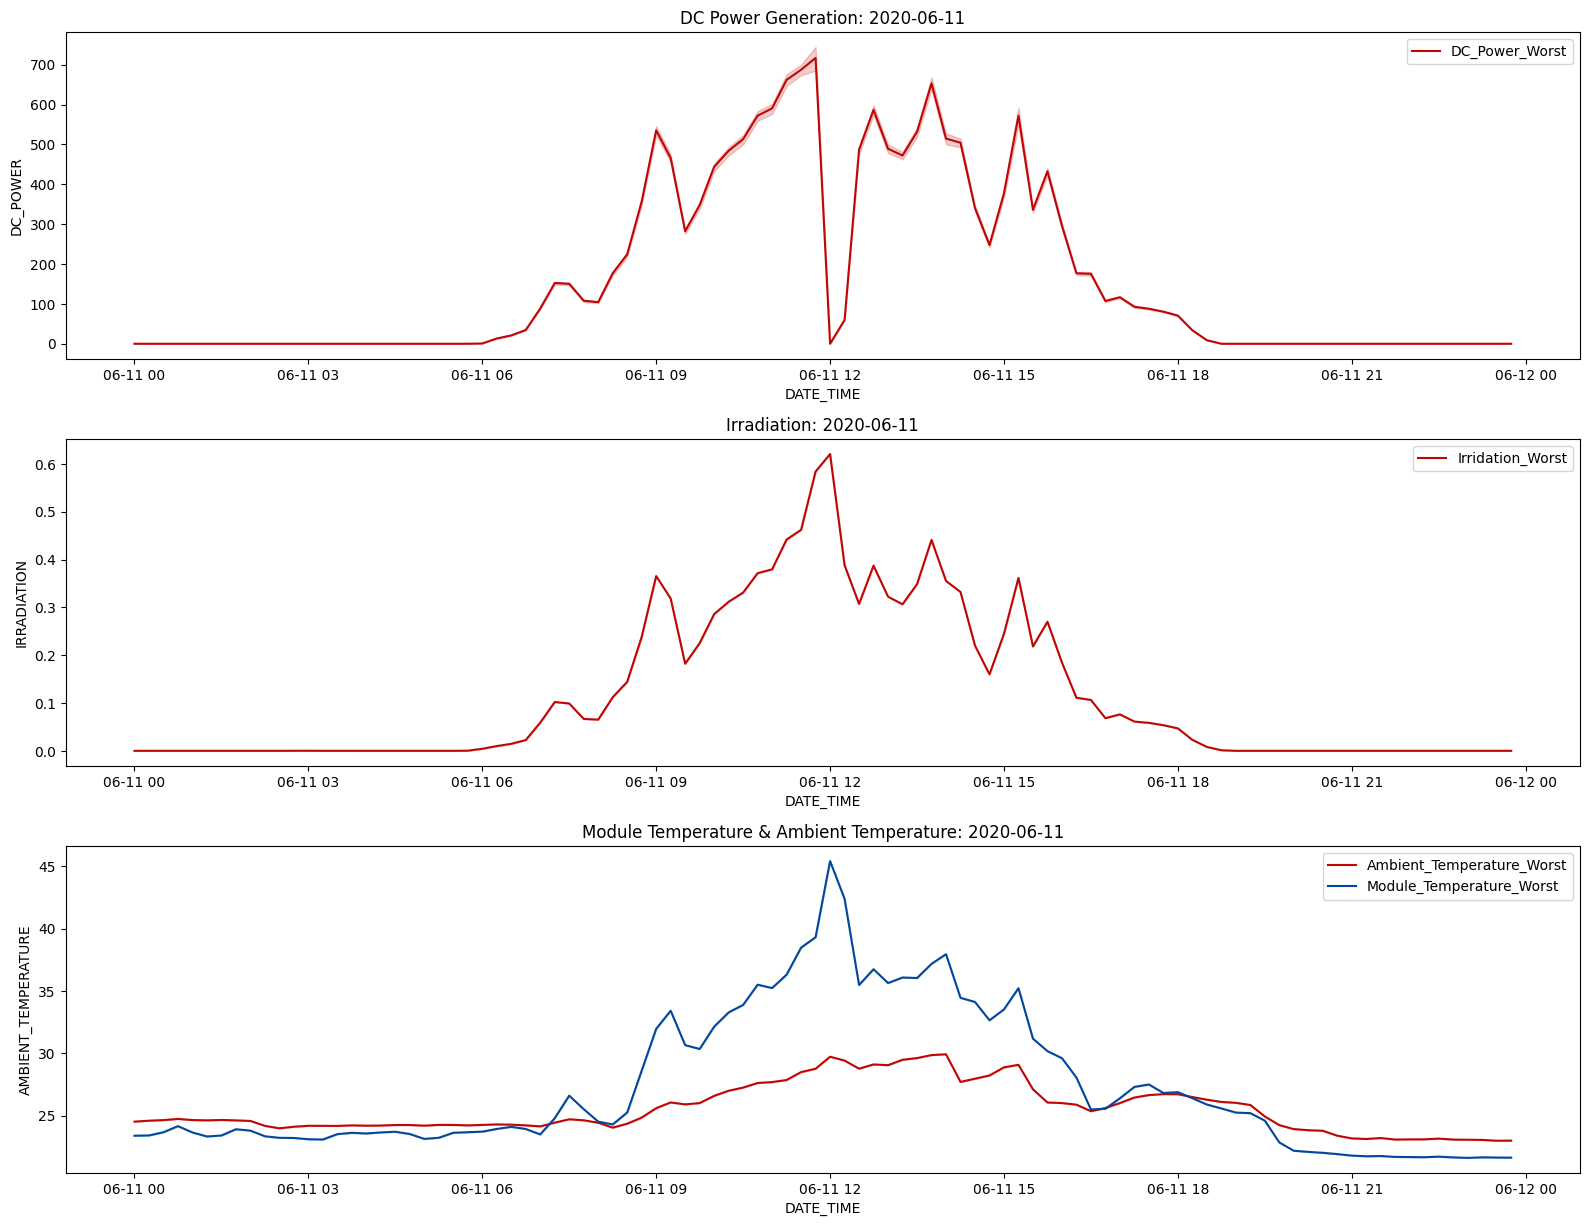

In [ ]:
# Lowest Average on "2020-06-11"
plt.figure(figsize=(16, 16))

date = ["2020-06-11"]

# DC Power
plt.subplot(411)
sns.lineplot(x=solar[solar["DATE_STRING"].isin(date)].DATE_TIME, y=solar[solar["DATE_STRING"].isin(date)].DC_POWER, label="DC_Power_Worst", color='#bf0603')
plt.title("DC Power Generation: {}".format(date[0]))

# Irradiation
plt.subplot(412)
sns.lineplot(x=solar[solar["DATE_STRING"].isin(date)].DATE_TIME, y=solar[solar["DATE_STRING"].isin(date)].IRRADIATION, label="Irridation_Worst", color='#bf0603')
plt.title("Irradiation: {}".format(date[0]))

# Module Temperature & Ambient Temperature
plt.subplot(413)
sns.lineplot(x=solar[solar["DATE_STRING"].isin(date)].DATE_TIME, y=solar[solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE, label="Ambient_Temperature_Worst", color='#bf0603')
sns.lineplot(x=solar[solar["DATE_STRING"].isin(date)].DATE_TIME, y=solar[solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE, label="Module_Temperature_Worst", color='#01479c')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()


Very Large Fluctuations in both DC_Power and Irradiation

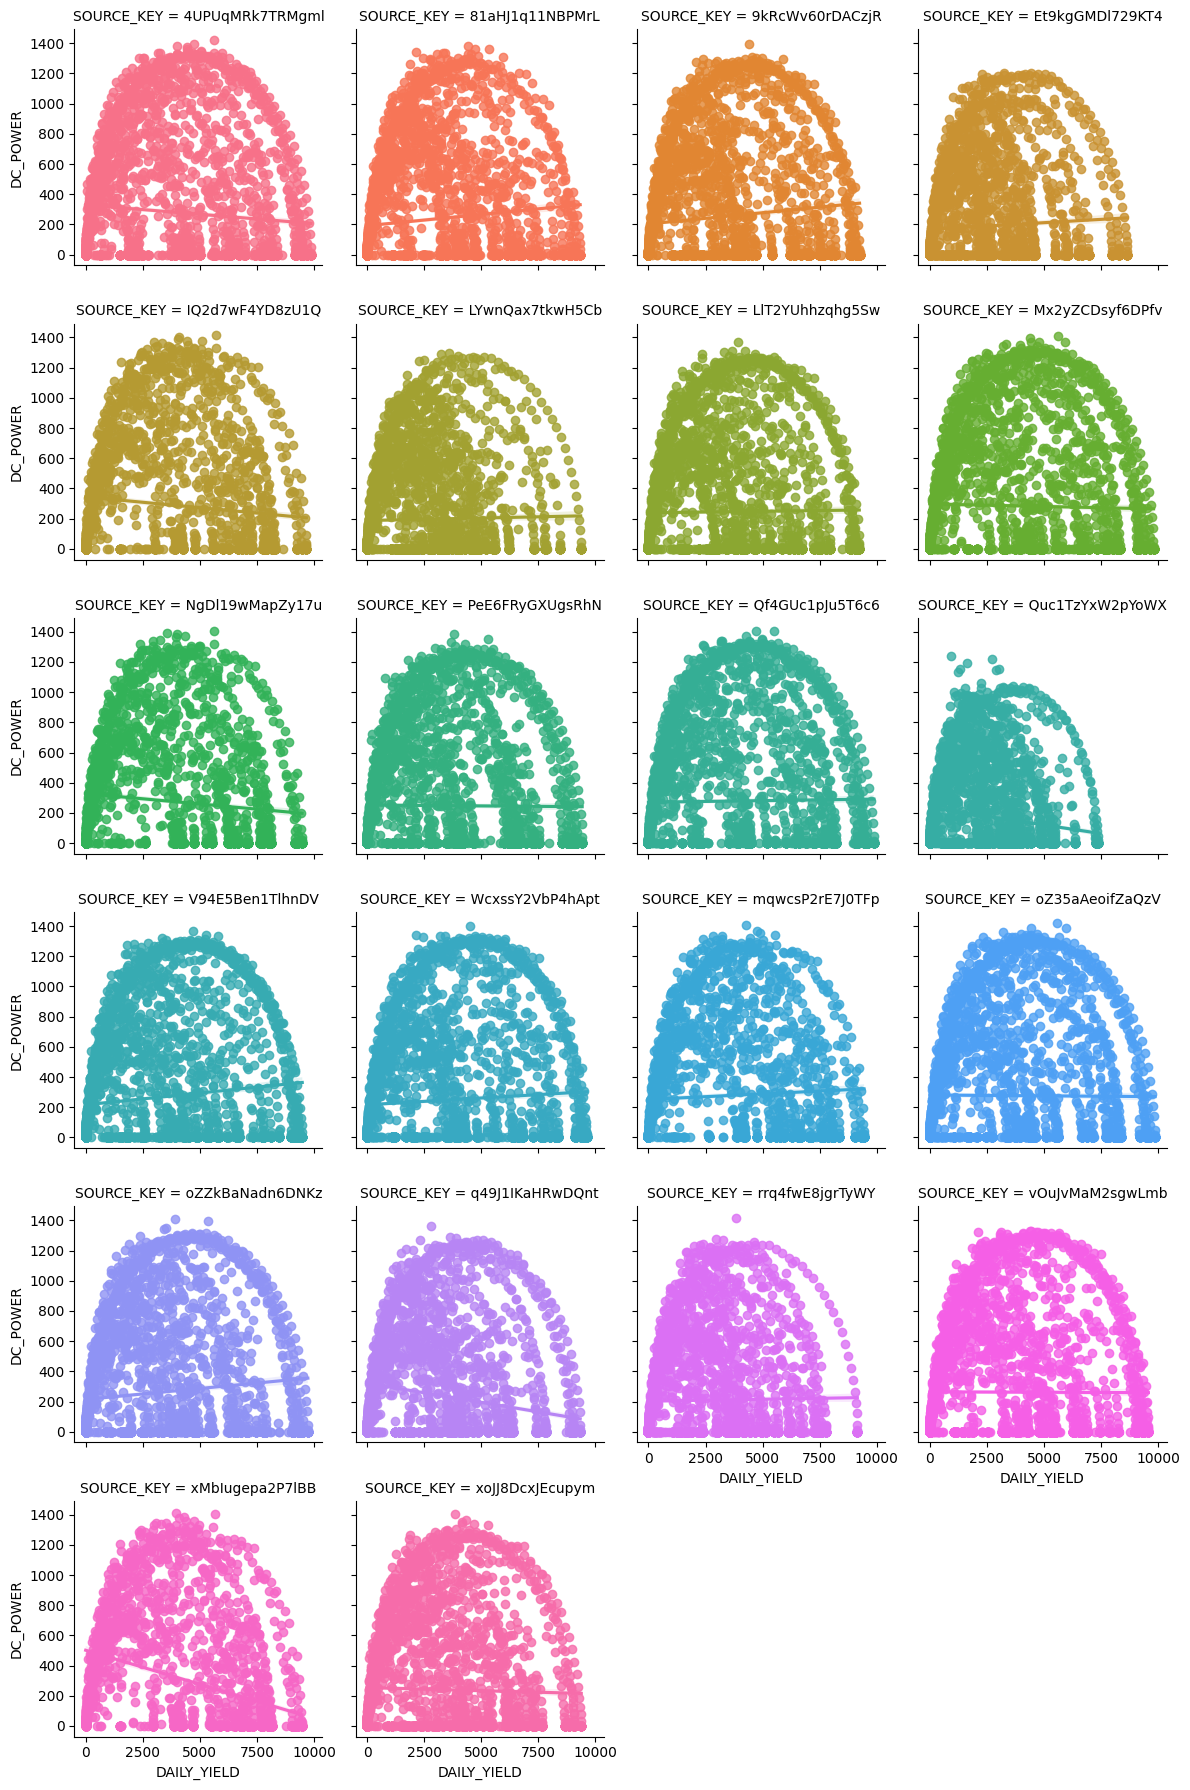

In [ ]:
# Data and Regression Model
sns.lmplot(y="DC_POWER",x="DAILY_YIELD",hue="SOURCE_KEY",col="SOURCE_KEY",height=3,col_wrap=4,data=solar,fit_reg=True);

# Solar Power Plant Inverter Efficiency Calculation


In [ ]:
# Neglecting zero value if any
solar_dc_power = solar[solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = solar[solar['AC_POWER'] > 0]['AC_POWER'].values

In [ ]:
# Power Ratio (Efficiency)
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power ratio AC/DC (Efficiency) of Solar Power Plant:  97.501 %


In [ ]:
# Here we take all nonzero AC values and plot them on histogram
AC_list=[]
for i in solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
AC_list.sort()
AC_list.reverse()
len(AC_list)

32036

In [ ]:
#Here we take all nonzero DC values and plot them on histogram
DC_list=[]
for i in solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

32036

[0.2857142857142857, 0.3999999999999999, 0.4, 0.4666666666666667, 0.4733333333333333, 0.48, 0.48, 0.4866666666666666, 0.4933333333333333, 0.4933333333333334, 0.5, 0.5, 0.5, 0.5066666666666666, 0.5066666666666666, 0.5066666666666666, 0.5133333333333333, 0.5133333333333333, 0.5133333333333333, 0.5133333333333333, 0.5133333333333334, 0.5199999999999999, 0.5199999999999999, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.5214285714285714, 0.5214285714285714, 0.5266666666666666, 0.5266666666666666, 0.5266666666666667, 0.5266666666666667, 0.5266666666666667, 0.5266666666666667, 0.5266666666666667, 0.5333333333333333, 0.5333333333333333, 0.5333333333333334, 0.5333333333333334, 0.5399999999999999, 0.5399999999999999, 0.54, 0.54, 0.5428571428571428, 0.5466666666666665, 0.5466666666666666, 0.5466666666666667, 0.5466666666666667, 0.5466666666666667, 0.5533333333333335, 0.557142857142857, 0.5599999999999999, 0.56, 0.5666666666666667, 0.5714285714285714, 0.5714285714285715, 0.5733333333333333, 0.58, 0.

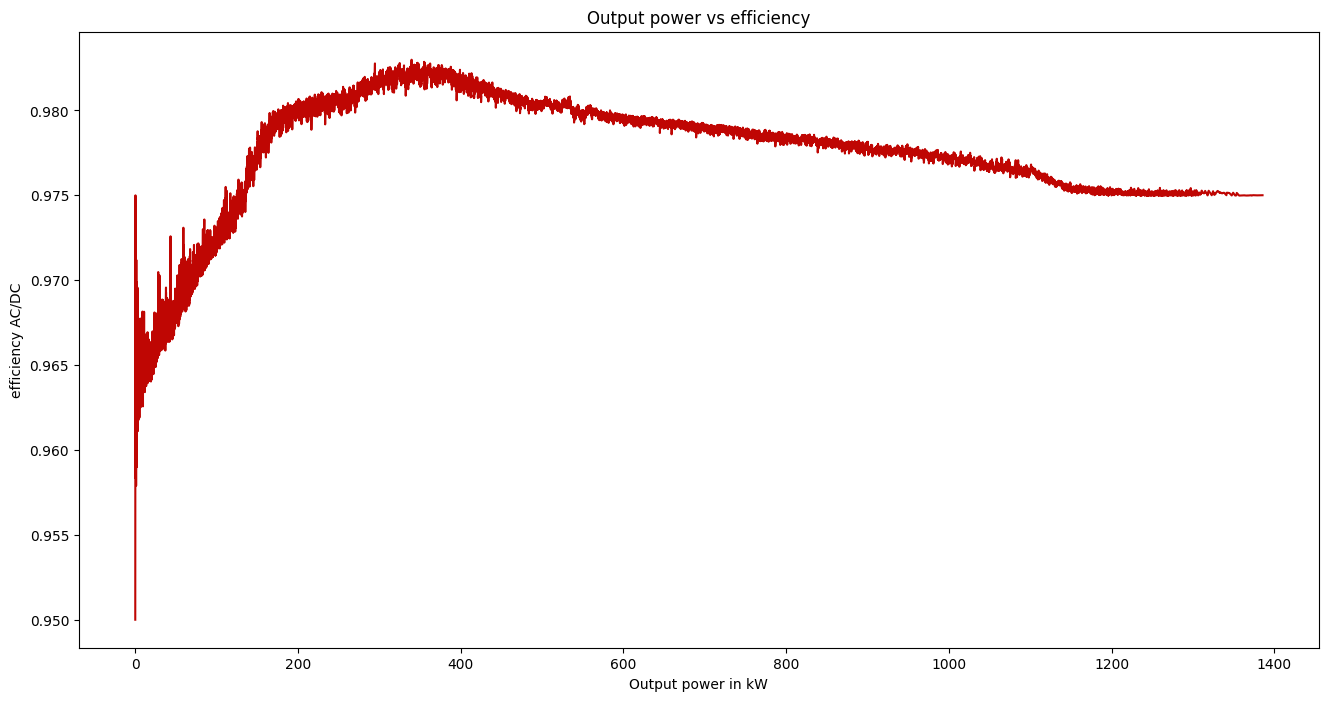

In [ ]:
#Output Power vs Efficiency
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()

print(DC_list)
DC_list.sort

res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='#bf0603')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');

# Solar Power Prediction

In [ ]:
# Creating a copy for Merged Solar Power Data
solar2 = solar.copy()

X = solar2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
Y = solar2['AC_POWER']

In [ ]:
X.head()

DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0     9425.000    2.429e+06               27.005              25.061   
1        0.000    1.215e+09               27.005              25.061   
2     3075.333    2.248e+09               27.005              25.061   
3      269.933    1.704e+06               27.005              25.061   
4     3177.000    1.994e+07               27.005              25.061   

   IRRADIATION  DC_POWER  
0          0.0       0.0  
1          0.0       0.0  
2          0.0       0.0  
3          0.0       0.0  
4          0.0       0.0

In [ ]:
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2,random_state=21)

## Model Score and R^2 Score

### Linear Regression

In [ ]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)

score_lr = 100*lr_clf.score(X_test,Y_test)
print(f'LR Model score = {score_lr:4.4f}%')

# R2 (coefficient of determination) for Linear Regression function

y_pred_lr = lr_clf.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,Y_test) * 100, 2)

print("R2 Score (LR): ",R2_Score_lr,"%")

LR Model score = 99.9994%
R2 Score (LR):  100.0 %


### Random Forest

In [ ]:
# Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)

# Calculate and print the raw score
raw_score_rfr = 100 * rfr.score(X_test, Y_test)
print(f'RF Model Raw Score: {raw_score_rfr:4.4f}%')

# Calculate and print the R2 score
y_pred_rfr = rfr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr, Y_test) * 100, 2)
print("R2 Score (RF):", R2_Score_rfr, "%")

RF Model Raw Score: 99.9999%
R2 Score (RF): 100.0 %


### Decision Tree

In [ ]:
# Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

dtr = DecisionTreeRegressor()
dtr.fit(X_train, Y_train)

# Calculate and print the raw score
raw_score_dtr = 100 * dtr.score(X_test, Y_test)
print(f'DT Model Raw Score: {raw_score_dtr:4.4f}%')

# Calculate and print the R2 score
y_pred_dtr = dtr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr, Y_test) * 100, 2)
print("R2 Score (DT):", R2_Score_dtr, "%")

DT Model Raw Score: 99.9999%
R2 Score (DT): 100.0 %


### XGBoost Regressor - Extreme Gradient Boosting

In [ ]:
# XGBoost Regressor Model
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

# Define the XGBoost Regressor
xgb = XGBRegressor()
xgb.fit(X_train, Y_train)

# Calculate and print the raw score
raw_score_xgb = 100 * xgb.score(X_test, Y_test)
print(f'XGBoost Model Raw Score: {raw_score_xgb:4.4f}%')

# Calculate and print the R2 score
y_pred_xgb = xgb.predict(X_test)
R2_Score_xgb = round(r2_score(y_pred_xgb, Y_test) * 100, 2)
print("R2 Score (XGBoost):", R2_Score_xgb, "%")


XGBoost Model Raw Score: 99.9984%
R2 Score (XGBoost): 100.0 %


### LGBM Regressor - Light Gradient Boost Machine

In [ ]:
# LightGBM Regressor Model
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score

# Define the LightGBM Regressor
lgbm = LGBMRegressor()
lgbm.fit(X_train, Y_train)

# Calculate and print the raw score
raw_score_lgbm = 100 * lgbm.score(X_test, Y_test)
print(f'LightGBM Model Raw Score: {raw_score_lgbm:4.4f}%')

# Calculate and print the R2 score
y_pred_lgbm = lgbm.predict(X_test)
R2_Score_lgbm = round(r2_score(y_pred_lgbm, Y_test) * 100, 2)
print("R2 Score (LightGBM):", R2_Score_lgbm, "%")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004118 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 54158, number of used features: 6
[LightGBM] [Info] Start training from score 241.880843
LightGBM Model Raw Score: 99.9984%
R2 Score (LightGBM): 100.0 %


### k-NN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Define the KNN Regressor
knn = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed

# Train the KNN Regressor
knn.fit(X_train, Y_train)

# Calculate and print the raw score
raw_score_knn = 100 * knn.score(X_test, Y_test)
print(f'KNN Model Raw Score: {raw_score_knn:4.4f}%')

# Calculate and print the R2 score
y_pred_knn = knn.predict(X_test)
R2_Score_knn = round(r2_score(y_pred_knn, Y_test) * 100, 2)
print("R2 Score (KNN):", R2_Score_knn, "%")


KNN Model Raw Score: 90.7690%
R2 Score (KNN): 89.47 %


# Result Prediction

### Linear Regression Prediction

In [ ]:
lr_pred= lr_clf.predict(X_test)
print(lr_pred)

[-1.11931665e-01  1.70540799e-01  6.83671356e+02 ... -1.42480570e-01
  1.00677157e+03  6.36228291e-02]


In [ ]:
crosscheck_lr = pd.DataFrame({'Actual' : Y_test , 'Predicted' : lr_pred})
crosscheck_lr.head()

Actual  Predicted
40426    0.000     -0.112
50974    0.000      0.171
53919  684.913    683.671
2384     0.000      0.402
22014    0.000      0.612

In [ ]:
crosscheck_lr['Error'] = crosscheck_lr['Actual'] - crosscheck_lr['Predicted']
crosscheck_lr.head()

Actual  Predicted  Error
40426    0.000     -0.112  0.112
50974    0.000      0.171 -0.171
53919  684.913    683.671  1.242
2384     0.000      0.402 -0.402
22014    0.000      0.612 -0.612

In [ ]:
crosscheckfinal_lr  = crosscheck_lr[crosscheck_lr['Error'] <= 20]
crosscheckfinal_lr.sample(25).style.background_gradient(
    cmap='coolwarm').set_properties(**{
        'font-size': '15px'
        })

### Random Forest Prediction

In [ ]:
prediction = rfr.predict(X_test)
print(prediction)

[   0.            0.          684.7183     ...    0.         1007.16376667
    0.        ]


In [ ]:
cross_checking = pd.DataFrame({'Actual' : Y_test , 'Predicted' : prediction})
cross_checking.head()

Actual  Predicted
40426    0.000      0.000
50974    0.000      0.000
53919  684.913    684.718
2384     0.000      0.000
22014    0.000      0.000

In [ ]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

Actual  Predicted  Error
40426    0.000      0.000  0.000
50974    0.000      0.000  0.000
53919  684.913    684.718  0.195
2384     0.000      0.000  0.000
22014    0.000      0.000  0.000

In [ ]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
    cmap='coolwarm').set_properties(**{
        'font-size': '15px'
        })

### Decision Tree Prediction

In [ ]:
dtr_pred = dtr.predict(X_test)
print(dtr_pred)

[   0.            0.          684.71333333 ...    0.         1007.21333333
    0.        ]


In [ ]:
crosscheck_dtr = pd.DataFrame({'Actual' : Y_test , 'Predicted' : dtr_pred})
crosscheck_dtr.head()

Actual  Predicted
40426    0.000      0.000
50974    0.000      0.000
53919  684.913    684.713
2384     0.000      0.000
22014    0.000      0.000

In [ ]:
crosscheck_dtr['Error'] = crosscheck_dtr['Actual'] - crosscheck_dtr['Predicted']
crosscheck_dtr.head()

Actual  Predicted  Error
40426    0.000      0.000    0.0
50974    0.000      0.000    0.0
53919  684.913    684.713    0.2
2384     0.000      0.000    0.0
22014    0.000      0.000    0.0

In [ ]:
crosscheckfinal_dtr  = crosscheck_dtr[crosscheck_dtr['Error'] <= 20]
crosscheckfinal_dtr.sample(25).style.background_gradient(
    cmap='coolwarm').set_properties(**{
        'font-size': '15px'
        })

### XGBoost Prediction

In [ ]:
xgb_pred = xgb.predict(X_test)
print(xgb_pred)

[-6.28152397e-03  1.92372792e-03  6.84676880e+02 ...  1.04446830e-02
  1.00396936e+03  3.15644109e-04]


In [ ]:
crosscheck_xgb = pd.DataFrame({'Actual' : Y_test , 'Predicted' : xgb_pred})
crosscheck_xgb.head()

Actual  Predicted
40426    0.000 -6.282e-03
50974    0.000  1.924e-03
53919  684.913  6.847e+02
2384     0.000  3.661e-03
22014    0.000  9.099e-04

In [ ]:
crosscheck_xgb['Error'] = crosscheck_xgb['Actual'] - crosscheck_xgb['Predicted']
crosscheck_xgb.head()

Actual  Predicted      Error
40426    0.000 -6.282e-03  6.282e-03
50974    0.000  1.924e-03 -1.924e-03
53919  684.913  6.847e+02  2.365e-01
2384     0.000  3.661e-03 -3.661e-03
22014    0.000  9.099e-04 -9.099e-04

In [ ]:
crosscheckfinal_xgb  = crosscheck_xgb[crosscheck_xgb['Error'] <= 20]
crosscheckfinal_xgb.sample(25).style.background_gradient(
    cmap='coolwarm').set_properties(**{
        'font-size': '15px'
        })

### LGBM Prediciton

In [ ]:
lgbm_pred = lgbm.predict(X_test)
print(lgbm_pred)

[1.09873138e-02 1.09873138e-02 6.83022428e+02 ... 1.09873138e-02
 1.00531192e+03 1.09873138e-02]


In [ ]:
crosscheck_lgbm = pd.DataFrame({'Actual' : Y_test , 'Predicted' : lgbm_pred})
crosscheck_lgbm.head()

Actual  Predicted
40426    0.000      0.011
50974    0.000      0.011
53919  684.913    683.022
2384     0.000      0.011
22014    0.000      0.011

In [ ]:
crosscheck_lgbm['Error'] = crosscheck_lgbm['Actual'] - crosscheck_lgbm['Predicted']
crosscheck_lgbm.head()

Actual  Predicted  Error
40426    0.000      0.011 -0.011
50974    0.000      0.011 -0.011
53919  684.913    683.022  1.891
2384     0.000      0.011 -0.011
22014    0.000      0.011 -0.011

In [ ]:
crosscheckfinal_lgbm  = crosscheck_lgbm[crosscheck_lgbm['Error'] <= 20]
crosscheckfinal_lgbm.sample(25).style.background_gradient(
    cmap='coolwarm').set_properties(**{
        'font-size': '15px'
        })

### k-NN Regression

In [ ]:
knn_pred = knn.predict(X_test)
print(knn_pred)

[   0.            0.          631.212      ...    0.         1106.62771429
    0.        ]


In [ ]:
crosscheck_knn = pd.DataFrame({'Actual' : Y_test , 'Predicted' : knn_pred})
crosscheck_knn.head()

Actual  Predicted
40426    0.000      0.000
50974    0.000      0.000
53919  684.913    631.212
2384     0.000      0.000
22014    0.000      0.000

In [ ]:
crosscheck_knn['Error'] = crosscheck_knn['Actual'] - crosscheck_knn['Predicted']
crosscheck_knn.head()

Actual  Predicted   Error
40426    0.000      0.000   0.000
50974    0.000      0.000   0.000
53919  684.913    631.212  53.701
2384     0.000      0.000   0.000
22014    0.000      0.000   0.000

In [ ]:
crosscheckfinal_knn  = crosscheck_knn[crosscheck_knn['Error'] <= 20]
crosscheckfinal_knn.sample(25).style.background_gradient(
    cmap='coolwarm').set_properties(**{
        'font-size': '15px'
        })

# AC Power Prediction using Input from User

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import mean_squared_error

# Define the range for each column (0 to positive infinity)
column_ranges = {
    'DAILY_YIELD': (0, float('inf')),
    'TOTAL_YIELD': (0, float('inf')),
    'AMBIENT_TEMPERATURE': (0, float(35)),
    'MODULE_TEMPERATURE': (0, 80),
    'IRRADIATION': (0, float(10)),
    'DC_POWER': (0, float('inf')),
    'AC_POWER': (0, float('inf')),
}

# Function for input validation
def get_user_input(column_name):
    while True:
        try:
            user_input = float(input(f"Enter {column_name}: "))
            if column_ranges[column_name][0] <= user_input <= column_ranges[column_name][1]:
                return user_input
            else:
                print(f"Value must be in the range {column_ranges[column_name][0]} - {column_ranges[column_name][1]}")
        except ValueError:
            print("Invalid input. Please enter a numeric value.")

# Get user input for X values
daily_yield = get_user_input('DAILY_YIELD')
total_yield = get_user_input('TOTAL_YIELD')
ambient_temperature = get_user_input('AMBIENT_TEMPERATURE')
module_temperature = get_user_input('MODULE_TEMPERATURE')
irradiation = get_user_input('IRRADIATION')
dc_power = get_user_input('DC_POWER')

# Create a DataFrame with user input
user_input = pd.DataFrame({
    'DAILY_YIELD': [daily_yield],
    'TOTAL_YIELD': [total_yield],
    'AMBIENT_TEMPERATURE': [ambient_temperature],
    'MODULE_TEMPERATURE': [module_temperature],
    'IRRADIATION': [irradiation],
    'DC_POWER': [dc_power],
})

print(f'\nAC_POWER:')

# Linear Regression Prediction
lr_user_pred = lr_clf.predict(user_input)
print(f'\nLinear Regression Prediction: {lr_user_pred[0]}')

# Random Forest Regression Prediction
rfr_user_pred = rfr.predict(user_input)
print(f'Random Forest Regression Prediction: {rfr_user_pred[0]}')

# Decision Tree Regression Prediction
dtr_user_pred = dtr.predict(user_input)
print(f'Decision Tree Regression Prediction: {dtr_user_pred[0]}')

# XGBoost Regression Prediction
xgb_user_pred = xgb.predict(user_input)
print(f'XGBoost Regression Prediction: {xgb_user_pred[0]}')

# LightGBM Regression Prediction
lgbm_user_pred = lgbm.predict(user_input)
print(f'LightGBM Regression Prediction: {lgbm_user_pred[0]}')

# k-NN Regressor Prediction
knn_user_pred = knn.predict(user_input)
print(f'k-NN Regressor Prediction: {knn_user_pred[0]}')

Enter DAILY_YIELD: 9000
Enter TOTAL_YIELD: 89137
Enter AMBIENT_TEMPERATURE: 29
Enter MODULE_TEMPERATURE: 68
Enter IRRADIATION: 1.08742
Enter DC_POWER: 119

AC_POWER:

Linear Regression Prediction: 114.86039246236209
Random Forest Regression Prediction: 115.75546666666662
Decision Tree Regression Prediction: 115.69333333333334
XGBoost Regression Prediction: 119.63377380371094
LightGBM Regression Prediction: 113.91130583728918
k-NN Regressor Prediction: 91.93466666666667


# Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error

# Linear Regression
y_pred_train_lr = lr_clf.predict(X_train)
y_pred_test_lr = lr_clf.predict(X_test)
mse_train_lr = mean_squared_error(Y_train, y_pred_train_lr)
mse_test_lr = mean_squared_error(Y_test, y_pred_test_lr)

print(f'Mean Squared Error LR (Training): {mse_train_lr}')
print(f'Mean Squared Error LR (Testing): {mse_test_lr}')

# Random Forest Regressor
y_pred_train_rfr = rfr.predict(X_train)
y_pred_test_rfr = rfr.predict(X_test)
mse_train_rfr = mean_squared_error(Y_train, y_pred_train_rfr)
mse_test_rfr = mean_squared_error(Y_test, y_pred_test_rfr)

print(f'\nMean Squared Error RFR (Training): {mse_train_rfr}')
print(f'Mean Squared Error RFR (Testing): {mse_test_rfr}')

# Decision Tree Regressor
y_pred_train_dtr = dtr.predict(X_train)
y_pred_test_dtr = dtr.predict(X_test)
mse_train_dtr = mean_squared_error(Y_train, y_pred_train_dtr)
mse_test_dtr = mean_squared_error(Y_test, y_pred_test_dtr)

print(f'\nMean Squared Error DTR (Training): {mse_train_dtr}')
print(f'Mean Squared Error DTR (Testing): {mse_test_dtr}')

# XGBoost Regressor
y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)
mse_train_xgb = mean_squared_error(Y_train, y_pred_train_xgb)
mse_test_xgb = mean_squared_error(Y_test, y_pred_test_xgb)

print(f'\nMean Squared Error XGBoost (Training): {mse_train_xgb}')
print(f'Mean Squared Error XGBoost (Testing): {mse_test_xgb}')

# LightGBM Regressor
y_pred_train_lgbm = lgbm.predict(X_train)
y_pred_test_lgbm = lgbm.predict(X_test)
mse_train_lgbm = mean_squared_error(Y_train, y_pred_train_lgbm)
mse_test_lgbm = mean_squared_error(Y_test, y_pred_test_lgbm)

print(f'\nMean Squared Error LightGBM (Training): {mse_train_lgbm}')
print(f'Mean Squared Error LightGBM (Testing): {mse_test_lgbm}')

# k - NN Regressor
y_pred_train_knn = knn.predict(X_train)
y_pred_test_knn = knn.predict(X_test)
mse_train_knn = mean_squared_error(Y_train, y_pred_train_knn)
mse_test_knn = mean_squared_error(Y_test, y_pred_test_knn)

print(f'\nMean Squared Error k-NN (Training): {mse_train_knn}')
print(f'Mean Squared Error k-NN (Testing): {mse_test_knn}')


Mean Squared Error LR (Training): 0.8634268333892621
Mean Squared Error LR (Testing): 0.7460495265578769

Mean Squared Error RFR (Training): 0.03153025171371947
Mean Squared Error RFR (Testing): 0.10095717833845555

Mean Squared Error DTR (Training): 3.1487766302126157e-29
Mean Squared Error DTR (Testing): 0.185242134575807

Mean Squared Error XGBoost (Training): 0.9590779195861756
Mean Squared Error XGBoost (Testing): 2.144358180721803

Mean Squared Error LightGBM (Training): 1.6619435163372867
Mean Squared Error LightGBM (Testing): 2.0525699191214777

Mean Squared Error k-NN (Training): 7021.625699466242
Mean Squared Error k-NN (Testing): 11998.422745252787


# Bias and Variance

In [ ]:
from sklearn.model_selection import cross_val_predict
# Define a function to calculate bias and variance
def calculate_bias_variance(model, X, Y, cv=5):
    predictions = cross_val_predict(model, X, Y, cv=cv)
    bias_squared = np.mean((predictions - np.mean(predictions))**2)
    variance = np.var(predictions)

    return bias_squared, variance

# Calculate bias and variance for each model
linear_reg_bias, linear_reg_variance = calculate_bias_variance(lr_clf, X, Y)
rf_bias, rf_variance = calculate_bias_variance(rfr, X, Y)
dt_bias, dt_variance = calculate_bias_variance(dtr, X, Y)
xgb_bias, xgb_variance = calculate_bias_variance(xgb, X, Y)
lgbm_bias, lgbm_variance = calculate_bias_variance(lgbm, X, Y)
knn_bias, knn_variance = calculate_bias_variance(knn, X, Y)

# Display results
print(f'\nLinear Regression Bias^2: {linear_reg_bias}')
print(f'Linear Regression Variance: {linear_reg_variance}')

print(f'\nRandom Forest Regression Bias^2: {rf_bias}')
print(f'Random Forest Regression Variance: {rf_variance}')

print(f'\nDecision Tree Regression Bias^2: {dt_bias}')
print(f'Decision Tree Regression Variance: {dt_variance}')

# XGBoost Regression
print(f'\nXGBoost Regression Bias^2: {xgb_bias}')
print(f'XGBoost Regression Variance: {xgb_variance}')

# LightGBM Regression
print(f'\nLightGBM Regression Bias^2: {lgbm_bias}')
print(f'LightGBM Regression Variance: {lgbm_variance}')

# k-NN Regressor
print(f'\nk-NN Regressor Bias^2: {knn_bias}')
print(f'k-NN Regressor Variance: {knn_variance}')



[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004322 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 54158, number of used features: 6
[LightGBM] [Info] Start training from score 236.413677
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001294 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 54158, number of used features: 6
[LightGBM] [Info] Start training from score 228.033713
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001285 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

# Training and Testing Score

In [ ]:
# Linear Regression
# Calculate the training score
train_lr = lr_clf.score(X_train, Y_train)

# Calculate the testing score
test_lr = lr_clf.score(X_test, Y_test)

# Display results
print('Linear Regression: ')
print(f'Training Score: {train_lr}')
print(f'Testing Score:  {test_lr}')

# ------------------------------------------------------------------

# Random Forest
# Calculate the training score
train_rfr = rfr.score(X_train, Y_train)

# Calculate the testing score
test_rfr = rfr.score(X_test, Y_test)

# Display results
print('\nRandom Forest Regressor: ')
print(f'Training Score: {train_rfr}')
print(f'Testing Score:  {test_rfr}')

# ------------------------------------------------------------------

# Decision Tree
# Calculate the training score
train_dtr = dtr.score(X_train, Y_train)

# Calculate the testing score
test_dtr = dtr.score(X_test, Y_test)

# Display results
print('\nDecision Tree Regressor: ')
print(f'Training Score: {train_dtr}')
print(f'Testing Score:  {test_dtr}')

# ------------------------------------------------------------------\

# XGBoost Regressor
# Calculate the training score
train_xgb = xgb.score(X_train, Y_train)

# Calculate the testing score
test_xgb = xgb.score(X_test, Y_test)

# Display results
print('\nXGBoost Regressor: ')
print(f'Training Score: {train_xgb}')
print(f'Testing Score:  {test_xgb}')

# ------------------------------------------------------------------

# LightGBM Regressor
# Calculate the training score
train_lgbm = lgbm.score(X_train, Y_train)

# Calculate the testing score
test_lgbm = lgbm.score(X_test, Y_test)

# Display results
print('\nLightGBM Regressor: ')
print(f'Training Score: {train_lgbm}')
print(f'Testing Score:  {test_lgbm}')

# ------------------------------------------------------------------

# k-NN Regressor
# Calculate the training score
train_knn = knn.score(X_train, Y_train)

# Calculate the testing score
test_knn = knn.score(X_test, Y_test)

# Display results
print('\nk - NN Regressor: ')
print(f'Training Score: {train_knn}')
print(f'Testing Score:  {test_knn}')


Linear Regression: 
Training Score: 0.9999934293867416
Testing Score:  0.9999942602585881

Random Forest Regressor: 
Training Score: 0.9999997600571561
Testing Score:  0.9999992232846793

Decision Tree Regressor: 
Training Score: 1.0
Testing Score:  0.9999985748373088

XGBoost Regressor: 
Training Score: 0.9999927014891702
Testing Score:  0.9999835023533777

LightGBM Regressor: 
Training Score: 0.9999873527348458
Testing Score:  0.9999842085275223

k - NN Regressor: 
Training Score: 0.9465659565676895
Testing Score:  0.9076899837654602
